In [1]:
import pandas as pd
import os
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import itertools
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
import stop_words

%matplotlib inline

In [2]:
data  = pd.read_csv('go_V.csv', sep = ';')

In [3]:
vectorizer = TfidfVectorizer(stop_words=stop_words.get_stop_words('ru'))

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
X_train_, X_test_, y_train, y_test = train_test_split(data['text'], data['topic'], test_size=0.2, random_state=42)

In [6]:
X_test_

521    В Минске решили устроить белорусско-бразильски...
737    Североамериканский альянс в защиту приматов ос...
740    Британца Ники Хейвуда (Nicky Haywood) заставил...
660    Бывший президент Украины Виктор Ющенко должен ...
411    Португальские физики заявили что гипотетическа...
678    В Таиланде во время дайвинга в субботу 20 февр...
626    Власти осуществили сброс пароля от облачного х...
513    Администрация США добивается от компании Apple...
859    Герой американского мультипликационного сериал...
136    Аэропорт Траверс-Сити (США штат Мичиган) приня...
811    Высокий суд Лондона зарегистрировал иск России...
76     Правительство планирует обязать российские ком...
636    В рамках выставки MWC 2016 компания Samsung пр...
973    Эксперты второй месяц подряд наблюдают снижени...
938    Заместитель руководителя Федерального агентств...
899    В сети появился новый тизер шестого сезона сер...
280    Российский нападающий «Вашингтон Кэпиталс» Евг...
883    Студия Disney опубликова

In [7]:
X_train = vectorizer.fit_transform(X_train_.values.astype('U'))
X_test = vectorizer.transform(X_test_.values.astype('U'))

print(X_train.shape, X_test.shape)

(800, 29653) (200, 29653)


In [8]:
predictor_lr = LogisticRegression().fit(X_train, y_train)
predictor_svm = LinearSVC().fit(X_train, y_train)
predictor_rf = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
predictor_gbt = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)

In [9]:
y_pred_lr = predictor_lr.predict(X_test)
print ('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr), 2)))

LR accuracy: 0.96%


In [10]:
y_pred_svm = predictor_svm.predict(X_test)
print ('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_svm), 2)))

LR accuracy: 0.97%


In [11]:
y_pred_rf = predictor_rf.predict(X_test)
print ('RF accuracy: {}%'.format(round(np.mean(y_test == y_pred_rf), 2)))

RF accuracy: 0.93%


In [12]:
y_pred_gbt = predictor_gbt.predict(X_test)
print ('GBT accuracy: {}%'.format(round(np.mean(y_test == y_pred_gbt), 2)))

GBT accuracy: 0.92%


In [13]:
def plot_confusion_matrix(cm, title='Contingency matrix'):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[0])
    classes = [x.split('.')[-1] for x in initial_categories]
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

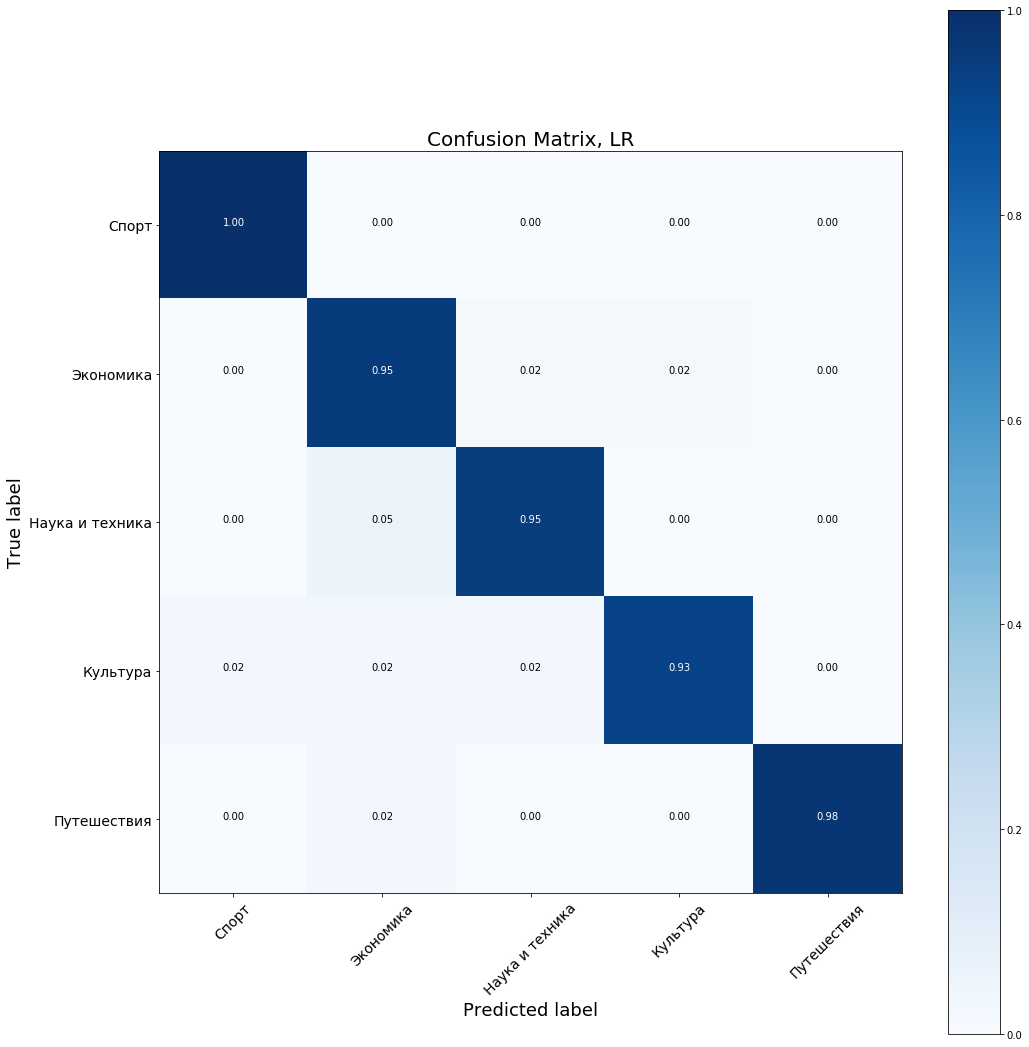

In [14]:
initial_categories = ['Спорт', 'Экономика', 'Наука и техника', 'Культура', 'Путешествия']
cmt_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cmt_lr, title='Confusion Matrix, LR')

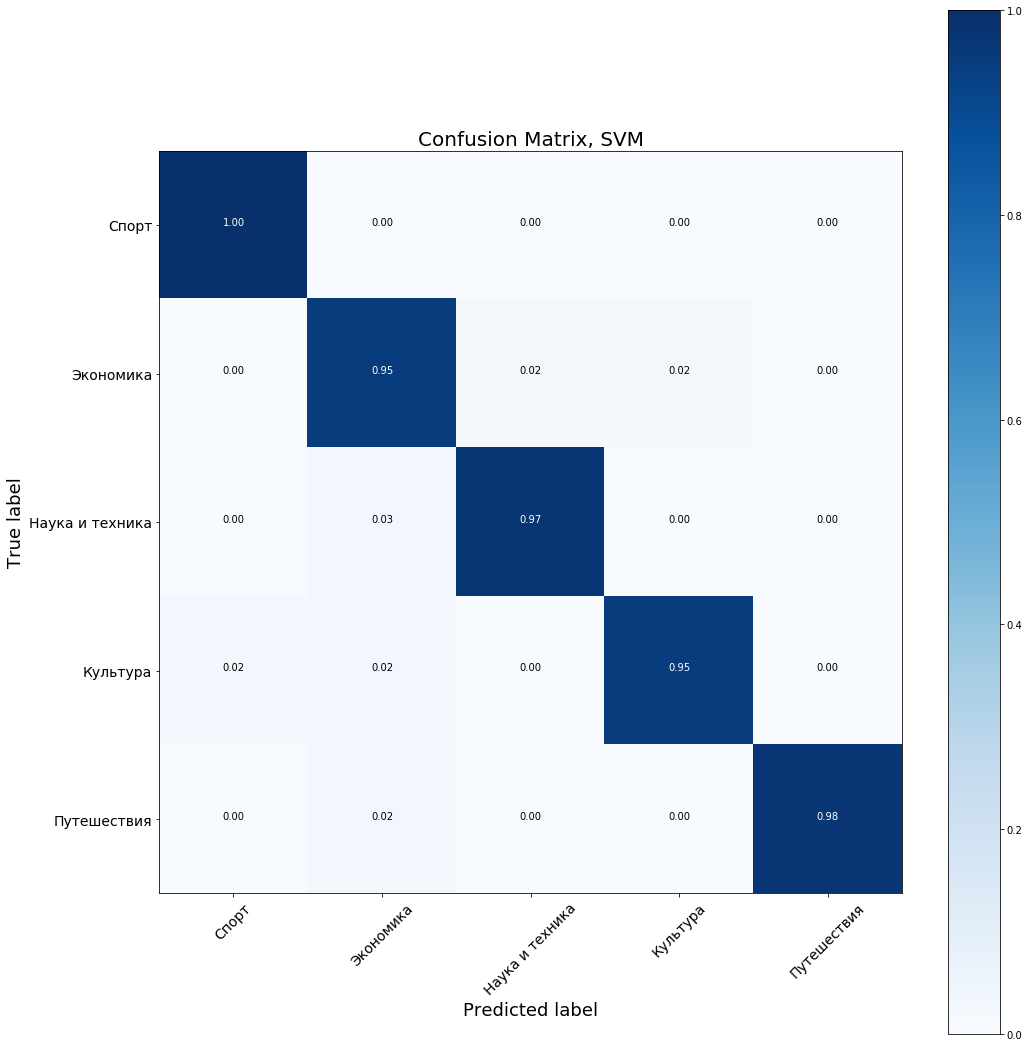

In [15]:
cmt_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cmt_svm, title='Confusion Matrix, SVM')

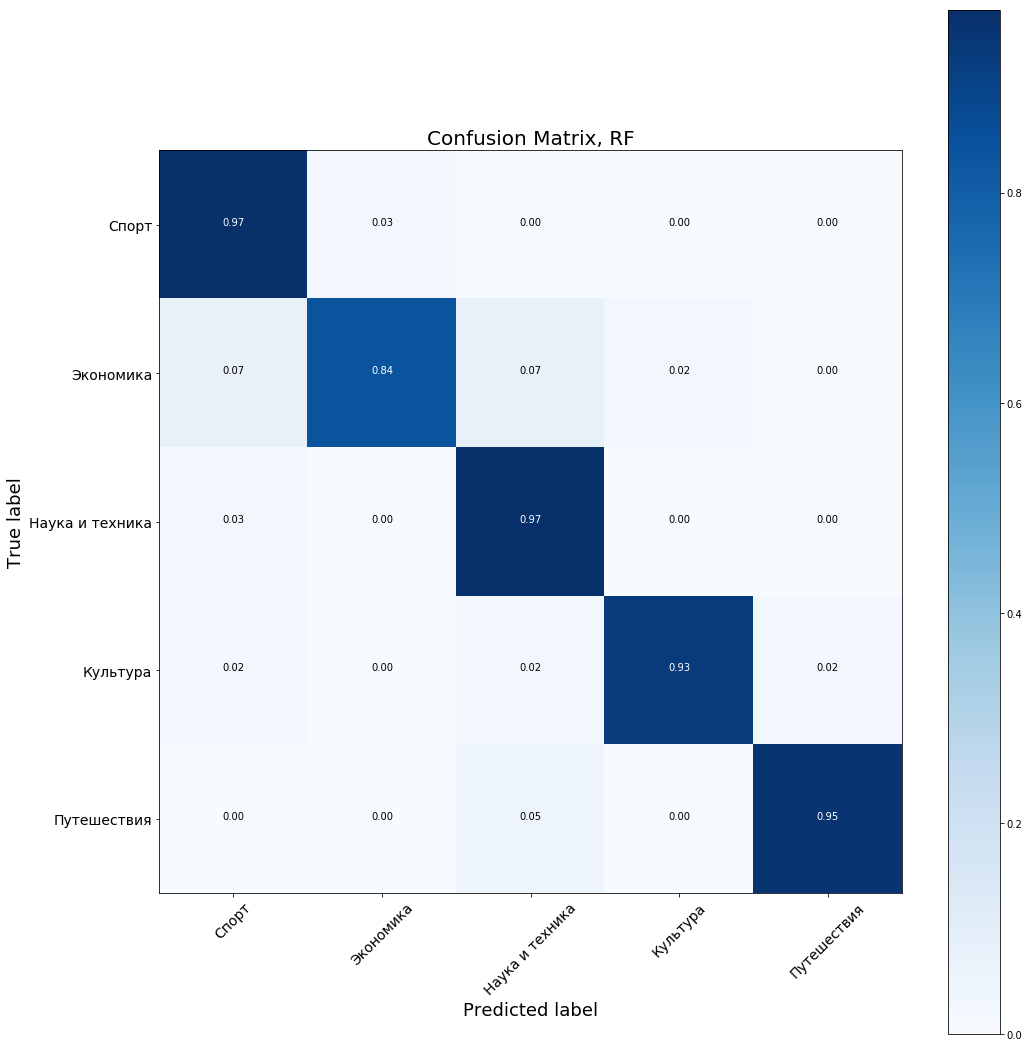

In [16]:
cmt_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cmt_rf, title='Confusion Matrix, RF')

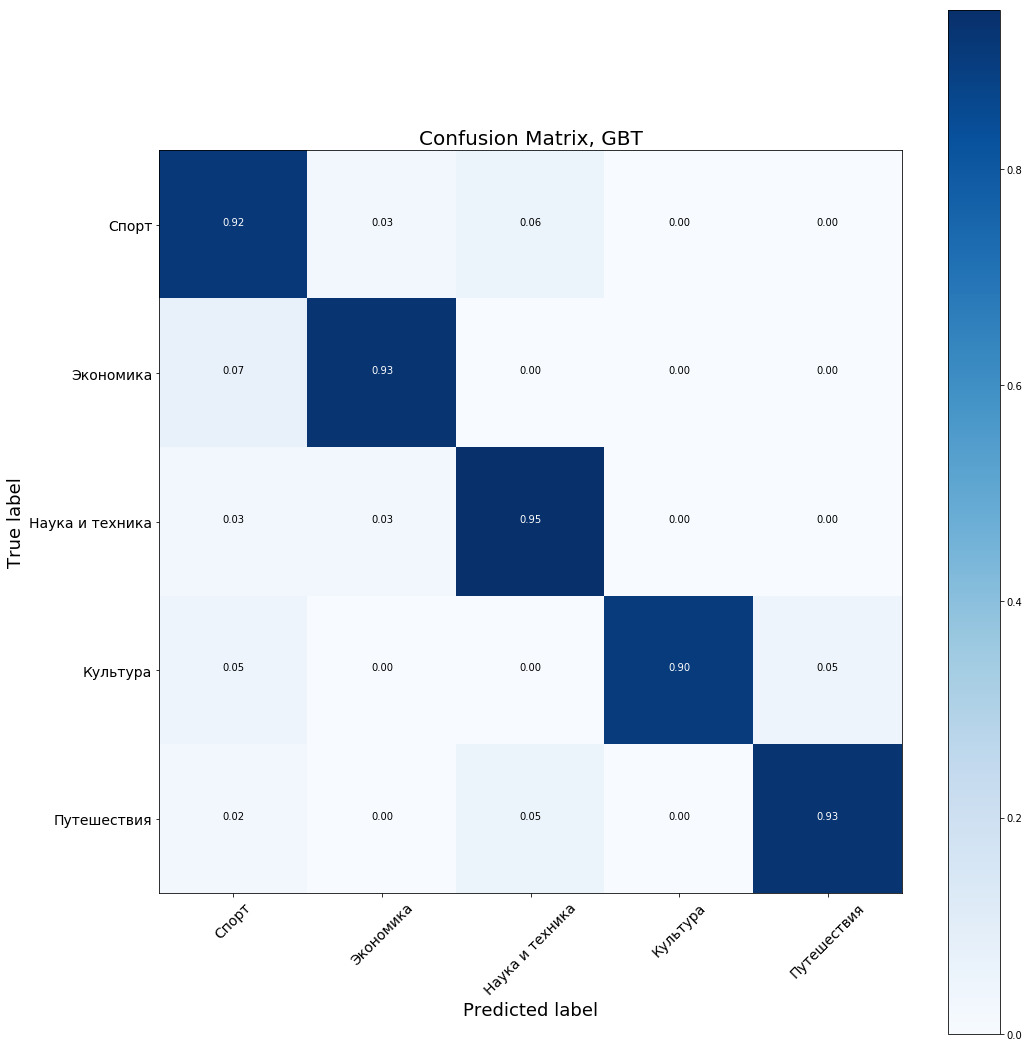

In [17]:
cmt_gbt = confusion_matrix(y_test, y_pred_gbt)
plot_confusion_matrix(cmt_gbt, title='Confusion Matrix, GBT')

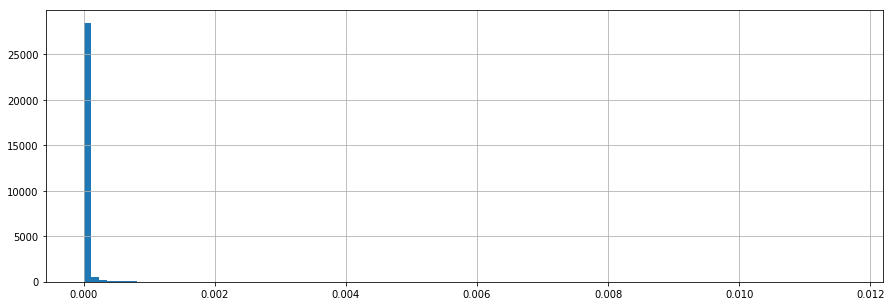

In [18]:
plt.figure(figsize=(15, 5))

plt.hist(predictor_rf.feature_importances_, bins=100)
plt.grid(True)

(0, 0.001)

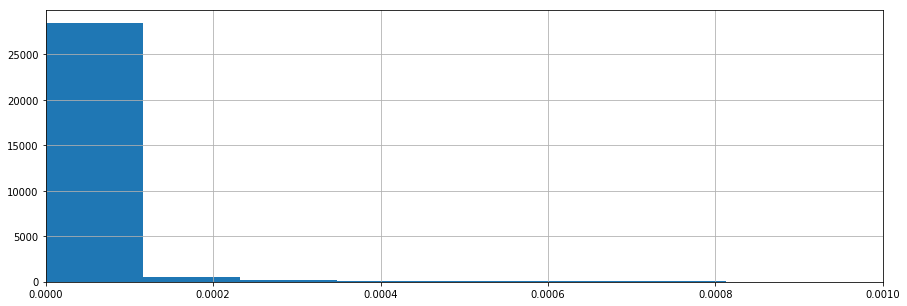

In [19]:
plt.figure(figsize=(15, 5))

plt.hist(predictor_rf.feature_importances_, bins=100)
plt.grid(True)
plt.xlim(0, 0.001)

In [20]:
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=10)).fit(X_train, y_train)

In [21]:
X_train_transformed = feature_selector.transform(X_train)
X_test_transformed = feature_selector.transform(X_test)

print (X_train_transformed.shape, X_test_transformed.shape)

(800, 1236) (200, 1236)


In [22]:
predictor_lr_ = LogisticRegression().fit(X_train_transformed, y_train)

In [23]:
y_pred_lr_ = predictor_lr_.predict(X_test_transformed)
print ('LR (with feature selection) accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr_), 2)))

LR (with feature selection) accuracy: 0.94%


In [24]:
predictor_oneVSall = OneVsRestClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [25]:
y_pred_onevsall = predictor_oneVSall.predict(X_test)
print ('One-VS-all accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsall), 2)))

One-VS-all accuracy: 0.97%


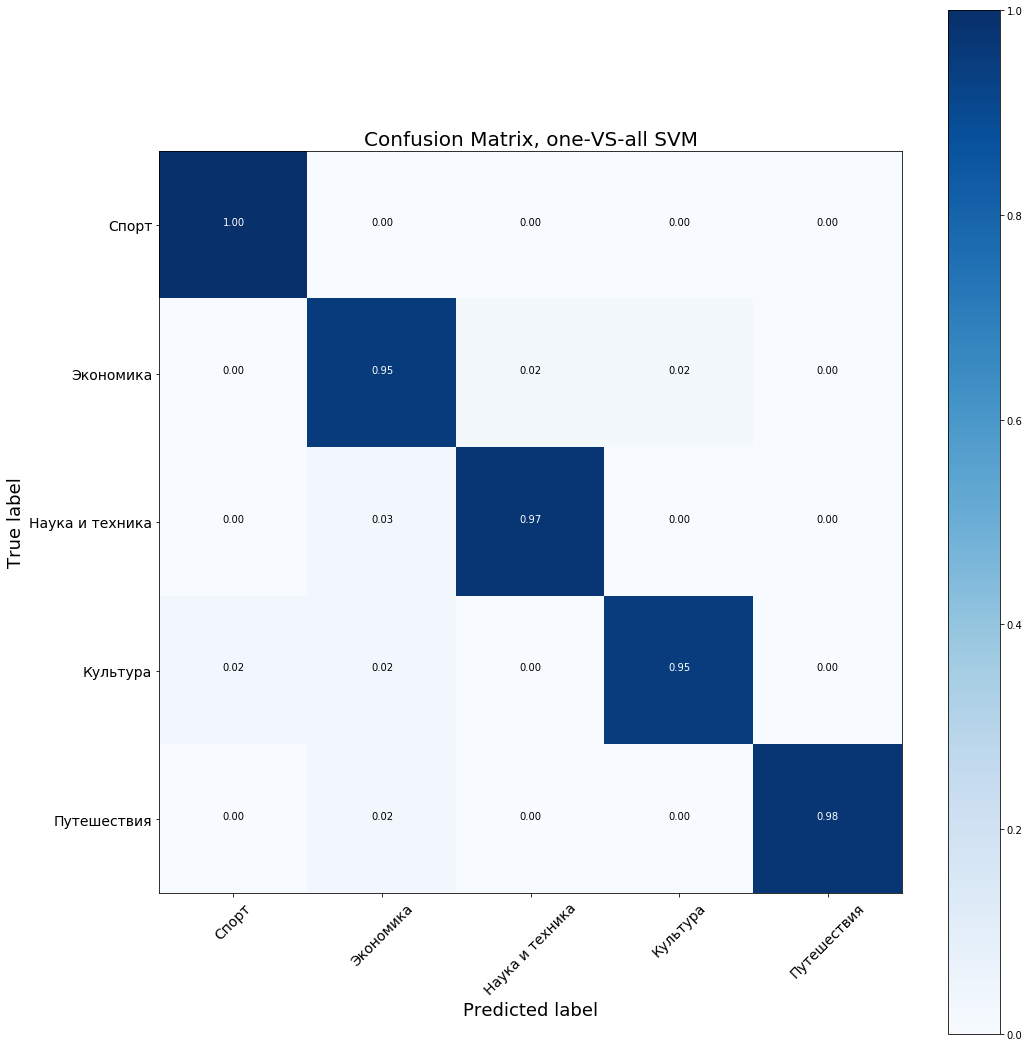

In [26]:
cmt_svm_onevsall = confusion_matrix(y_test, y_pred_onevsall)
plot_confusion_matrix(cmt_svm_onevsall, title='Confusion Matrix, one-VS-all SVM')

In [27]:
predictor_oneVSone = OneVsOneClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [28]:
y_pred_onevsone = predictor_oneVSone.predict(X_test)
print ('One-VS-one accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsone), 2)))

One-VS-one accuracy: 0.96%


In [153]:
#print (data[0])
texts = ([y_test != y_pred_onevsone])
for i in texts:
    print (X_test_[i])
    print (y_test[i])
    print (y_pred_onevsone[i])
    print ()

136    Аэропорт Траверс-Сити (США штат Мичиган) приня...
371    "Тина Канделаки решила продать Центр стратегич...
275    Мария Шарапова опустилась с шестой на седьмую ...
327    Проверка выявила грубые нарушения в деятельнос...
88     Авторы рекламного ролика первого чемпионата ми...
959    Черно-белую кошку по имени Феликс которая на п...
432    В кастинге девушек которые будут являться ring...
Name: text, dtype: object
136        Путешествия
371          Экономика
275              Спорт
327              Спорт
88     Наука и техника
959        Путешествия
432              Спорт
Name: topic, dtype: object
['Наука и техника' 'Наука и техника' 'Путешествия' 'Наука и техника'
 'Спорт' 'Наука и техника' 'Культура']



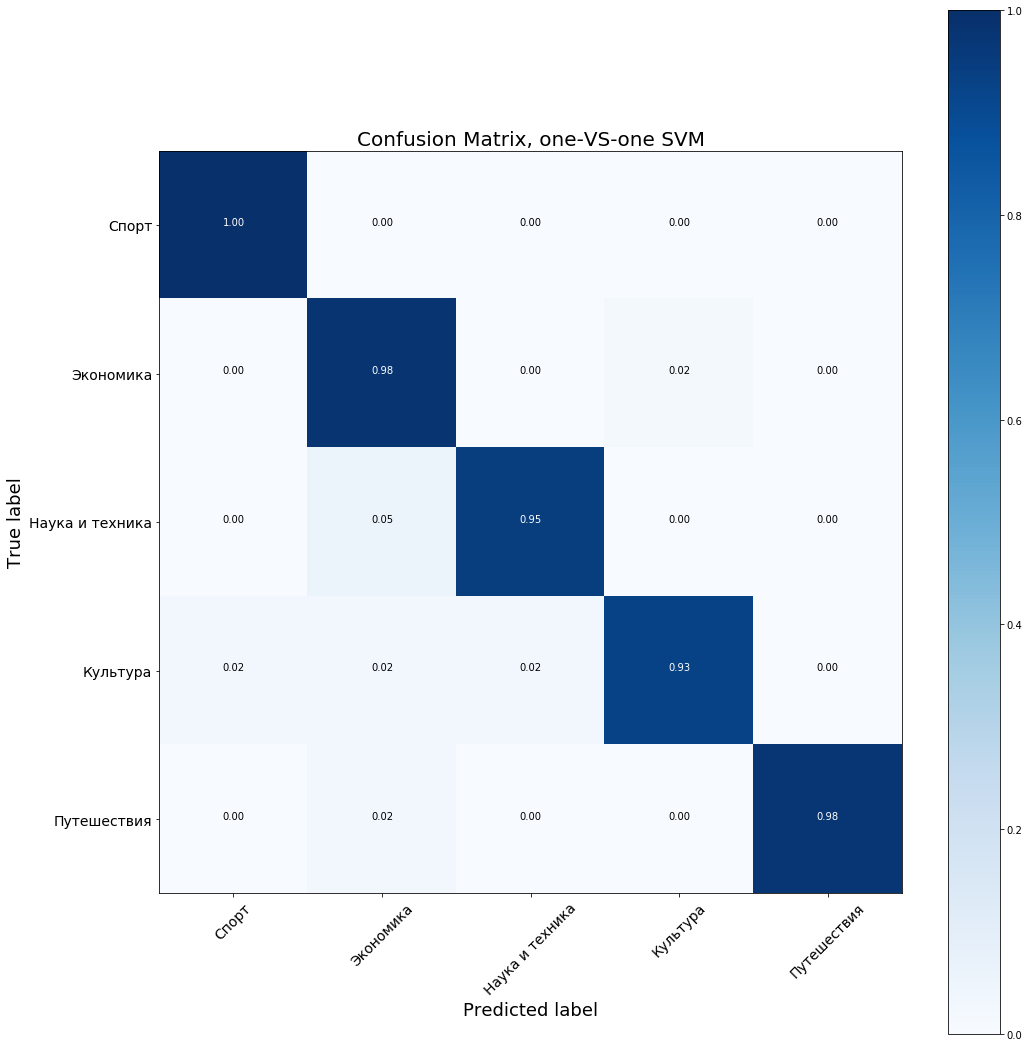

In [29]:
cmt_svm_onevsone = confusion_matrix(y_test, y_pred_onevsone)
plot_confusion_matrix(cmt_svm_onevsone, title='Confusion Matrix, one-VS-one SVM')

In [91]:
for c in np.unique(y_train):
    print ('Class \'{}\' samples N: {}'.format(c, y_train[y_train == c].shape[0]))

Class 'Культура' samples N: 164
Class 'Наука и техника' samples N: 157
Class 'Путешествия' samples N: 162
Class 'Спорт' samples N: 158
Class 'Экономика' samples N: 159


In [92]:
X_train_bin = vectorizer.fit_transform(X_train_[(y_train == "Наука и техника") | (y_train == "Спорт")].values.astype('U'))
y_train_bin = y_train[(y_train == "Наука и техника") | (y_train == "Спорт")]

y_train_bin[y_train_bin == "Наука и техника"] = 0
y_train_bin[y_train_bin == "Спорт"] = 1
y_train_bin=y_train_bin.astype('int')

print (X_train_bin.shape, y_train_bin.shape)

(315, 15482) (315,)


In [93]:
X_test_bin = vectorizer.transform(X_test_[(y_test == "Наука и техника") | (y_test == "Спорт")].values.astype('U'))
y_test_bin = y_test[(y_test == "Наука и техника") | (y_test == "Спорт")]

y_test_bin[y_test_bin == "Наука и техника"] = 0
y_test_bin[y_test_bin == "Спорт"] = 1
y_test_bin=y_test_bin.astype('int')

print (X_test_bin.shape, y_test_bin.shape)

(85, 15482) (85,)


In [94]:
one_binary_predictor = RandomForestClassifier(n_estimators=100).fit(X_train_bin, y_train_bin)

In [95]:
y_pred_binary = one_binary_predictor.predict(X_test_bin)

print ('Binary classifiers accuracy: {}%'.format(round(np.mean(y_pred_binary == y_test_bin), 2)))

Binary classifiers accuracy: 0.98%


In [96]:
def FP(y_true, y_pred):
    return float(np.sum(y_true[y_true == 0] != y_pred[y_true == 0]))

In [97]:
def TP(y_true, y_pred):
    return float(np.sum(y_true[y_true == 1] == y_pred[y_true == 1]))

In [98]:
def FN(y_true, y_pred):
    return float(np.sum(y_true[y_true == 1] != y_pred[y_true == 1]))

In [99]:
def TN(y_true, y_pred):
    return float(np.sum(y_true[y_true == 0] == y_pred[y_true == 0]))

In [100]:
fp = FP(y_test_bin, y_pred_binary)
fn = FN(y_test_bin, y_pred_binary)
tp = TP(y_test_bin, y_pred_binary)
tn = TN(y_test_bin, y_pred_binary)

print ('TP = {}, FP = {}, TN = {}, FN = {}\n---------------------------------------------\nsum = {}'.format(tp, fp, tn, fn, tp + fp + tn + fn))

TP = 41.0, FP = 1.0, TN = 42.0, FN = 1.0
---------------------------------------------
sum = 85.0


In [101]:
P = precision_score(y_test_bin, y_pred_binary)
R = recall_score(y_test_bin, y_pred_binary)

print ('Precision: {}, Recall: {}'.format(P, R))

Precision: 0.9761904761904762, Recall: 0.9761904761904762


In [102]:
print (tp / (tp + fp), tp / (tp + fn))

0.9761904761904762 0.9761904761904762


In [103]:
print ('F1: {}'.format(f1_score(y_test_bin, y_pred_binary)))

F1: 0.9761904761904762


In [104]:
print (2.0 * P * R / (P + R))

0.9761904761904762


In [105]:
scores_binary = one_binary_predictor.predict_proba(X_test_bin)[:, 1]

print (scores_binary.shape)

(85,)


D:\Anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


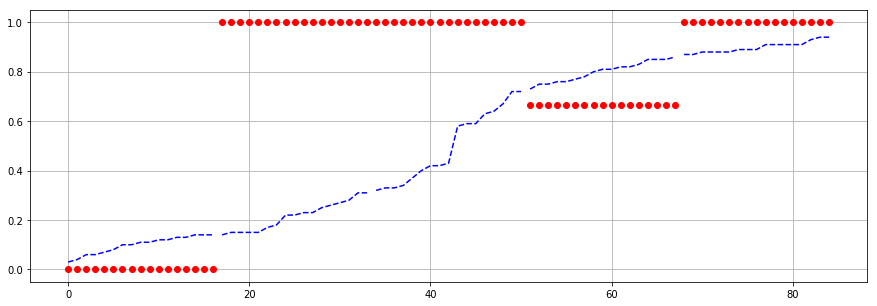

In [118]:
plt.figure(figsize=(15, 5))

N_batch = 5
inds = np.argsort(scores_binary)
scores_sorted = scores_binary[inds]
y_sorted = y_test_bin[inds]
q = len(y_test_bin) // N_batch

for i in range(N_batch):
    plt.plot(range(q * i, q * (i + 1)), scores_sorted[q * i : q * (i + 1)], '--b')
    plt.plot(range(q * i, q * (i + 1)), [np.mean(y_sorted[q * i : q * (i + 1)])] * q, 'ro')
    
plt.grid(True)

In [107]:
fpr, tpr, thresholds = roc_curve(y_test_bin, scores_binary)

(-0.1, 1.1)

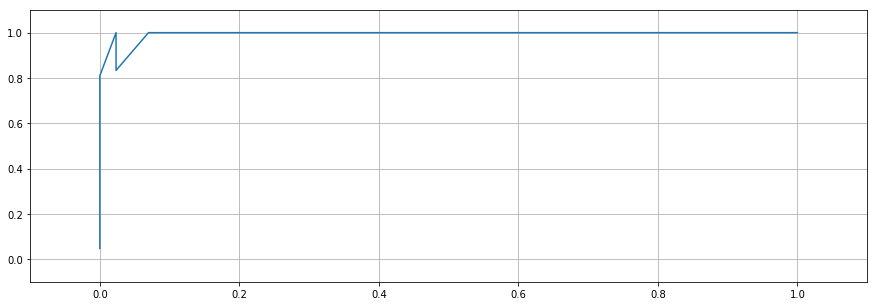

In [108]:
plt.figure(figsize=(15, 5))

inds = np.argsort(fpr)
plt.plot(fpr[inds], tpr[inds])
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

In [109]:
roc_auc = roc_auc_score(y_test_bin, scores_binary)

print ('AUC score: {}'.format(roc_auc, 2))

AUC score: 0.9958471760797342


In [110]:
f1_max = 0
y_pred_best = None

for thr in thresholds:
    y_pred_tuned = scores_binary.copy()
    y_pred_tuned[y_pred_tuned < thr] = 0
    y_pred_tuned[y_pred_tuned >= thr] = 1
    
    f1 = f1_score(y_test_bin, y_pred_tuned)
    if f1 > f1_max:
        f1_max = f1
        y_pred_best = y_pred_tuned
    if f1 > 0.894308943089:
        print ('thr = {}: F1 +{}'.format(thr, round(f1 - 0.8920570264765784, 4)))
        
print ()
print ('Max. F1: {}'.format(round(f1_max, 3)))

thr = 0.73: F1 +0.0027
thr = 0.72: F1 +0.0054
thr = 0.63: F1 +0.0462
thr = 0.59: F1 +0.0718
thr = 0.43: F1 +0.0962
thr = 0.42: F1 +0.0735
thr = 0.34: F1 +0.0413
thr = 0.33: F1 +0.021
thr = 0.32: F1 +0.0112

Max. F1: 0.988


In [111]:
print (np.mean(y_test_bin == y_pred_best))

0.9882352941176471


In [112]:
print (np.mean(RandomForestClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test) == y_test))
print (np.mean(RandomForestClassifier(n_estimators=100, criterion='entropy').fit(X_train, y_train).predict(X_test) == y_test))
print (np.mean(GradientBoostingClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test) == y_test))

0.85
0.945
0.85


In [113]:
ensemble_soft = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='soft', n_jobs=1)

ensemble_hard = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='hard', n_jobs=1)

In [114]:
ensemble_soft.fit(X_train, y_train)
ensemble_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('rf_gini_10', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
          ...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [115]:
y_pred_hard = ensemble_hard.predict(X_test)
y_pred_soft = ensemble_soft.predict(X_test)

print (y_pred_hard.shape, y_pred_soft.shape)

(200,) (200,)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [116]:
print ('Hard voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_hard), 2)))
print ('Soft voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_soft), 2)))

Hard voting accuracy: 0.9%
Soft voting accuracy: 0.92%
